# SVM

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("dataset/CL-dataset.csv",sep='\t',decimal=",",index_col=0)
df = df.drop(columns=["CustomerID"])

In [5]:
df.head()

,Imax,E,PIL,Mb,MeanD,EDate,class
0,12,4.335643,2.567,156.860294,0.000000,0.000000,2
1,32,6.503112,2.567,356.232222,35.000000,2.226424,2
2,360,6.504979,2.752,442.969333,24.266667,2.235084,2
3,80,4.494680,2.567,189.650000,55.400000,1.177965,1
4,32,0.000000,2.567,292.000000,13.000000,0.918296,1


In [6]:
from sklearn.model_selection import train_test_split

label = df.pop('class')
train_set, test_set, train_label, test_label = train_test_split(df, label, stratify =label, test_size=0.30)

In [7]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

## Grid Search

In [4]:


# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 100]}]

clf = GridSearchCV( SVC(), tuned_parameters,n_jobs=3,verbose=2,scoring='accuracy')
clf.fit(train_set, train_label)

print("Best parameters:",clf.best_params_)
print("Best Score: ",clf.best_score_)

print("Complete Grid search:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
    

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed: 19.7min finished
Best parameters:
{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
Complete Grid search:
0.751 (+/-0.010) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.754 (+/-0.004) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.709 (+/-0.010) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.697 (+/-0.009) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
Detailed classification report:


NameError: name 'test_labels' is not defined

## Modello Finale

In [8]:
from sklearn.svm import SVC
svm = SVC(kernel='sigmoid', C=0.5, gamma='scale', probability=True)
svm.fit(train_set, train_label)

SVC(C=0.5, kernel='sigmoid', probability=True)

In [10]:

from sklearn.metrics import classification_report
test_pred_proba_svm = svm.predict_proba(test_set)
test_pred_svm = svm.predict(test_set)
print(classification_report(test_label, 
                            test_pred_svm))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       859
           1       0.49      0.33      0.39       529
           2       0.33      0.44      0.38       285

    accuracy                           0.56      1673
   macro avg       0.50      0.50      0.49      1673
weighted avg       0.56      0.56      0.55      1673



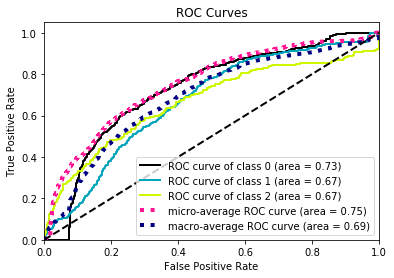

In [11]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc_curve(test_label.values, test_pred_proba_svm)
plt.show()